In [120]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.get_logger().setLevel('INFO')

# image = Image.open('test2.jpeg')
# print(image.format)
# print(image.size)
# print(image.mode)

In [2]:
CONV_GRAYSCALE = np.array([[0.5, 0.5, 0.5]]).reshape(3, -1)

In [111]:
def resize_img(image):
    """
    Resize image to shape (112, 112, 3)
    Args:
    img (PIL): PIL image object
    Returns
    original_image (ndarray (112, 112, 3)) : array of resized image
    """
    img_array = np.asarray(image)
    img_array = img_array[:112, :112, :3]  # Resize image to shape=(112, 112, 3) -fix if too small
#     img_array = np.resize(img_array, (400, 400, 3)) # If too small, fill with zeros
    return img_array

In [4]:
def convert_grayscale(original_image):
    """
    Converts original sized image array to grayscale
    Args:
    original_image (ndarray (400, 400, 3)) : array of sized image
    Returns
    X_img (ndarray (1, 160000)) : grayscale, reshaped image array
    """
    X_img = np.dot(original_img, CONV_GRAYSCALE)  # Convert to grayscale shape=(400, 400, 1)
    X_img = X_img.reshape(1, -1)  # Reshape to shape=(1, 160000)
    return X_img

In [ ]:
def load_data():
    """
    Loads data to X, y
    """
    for i in range 30:
        image = Image.open(f"{i}.png")
        original_img = resize_img(image)
        X_img = convert_grayscale(original_img) # Convert image to grayscale and reshape
        y_img = np.array([[1]]) # 0 = no face, 1 = face

In [123]:
# START - Load original image
image = Image.open('1.png')
print(type(image))
print(image.size)

<class 'PIL.PngImagePlugin.PngImageFile'>
(400, 400)


In [124]:
# Get resized, colored image array
original_img = resize_img(image) # shape=(112, 112, 3)
original_img.shape

(112, 112, 3)

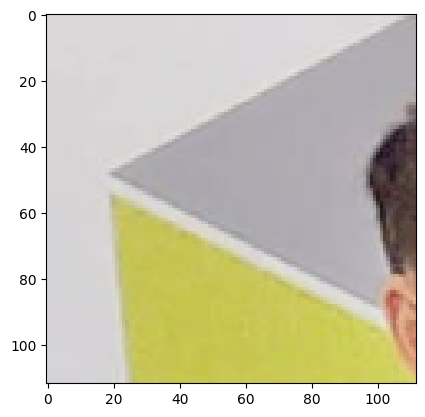

In [125]:
plt.imshow(original_img) # Show color, resized image

In [114]:
# Store X_img and y as one training example
X_img = convert_grayscale(original_img) # Convert image to grayscale and reshape
y_img = np.array([[1]]) # 0 = no face, 1 = face
(X_img.shape, y_img)

((1, 12544), array([[1]]))

In [73]:
# X = np.array(X_img)

In [74]:
X = np.concatenate((X, X_img), axis=0)
X.shape

(6, 160000)

In [75]:
# y = np.array(y_img)

In [76]:
y = np.concatenate((y, y_img), axis=0)
y.shape

(6, 1)

In [77]:
X

array([[325.5, 325.5, 325.5, ..., 192.5, 156.5, 158.5],
       [221.5, 220. , 216.5, ..., 113.5, 181. , 222.5],
       [103.5,  94.5,  88.5, ..., 268.5, 282. , 273.5],
       [356.5, 359.5, 362.5, ..., 206. , 210.5, 227. ],
       [114.5, 114.5, 114.5, ...,  16. ,  18.5,  18.5],
       [316.5, 315. , 315. , ...,  32. ,  31. ,  29.5]])

In [78]:
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0]])

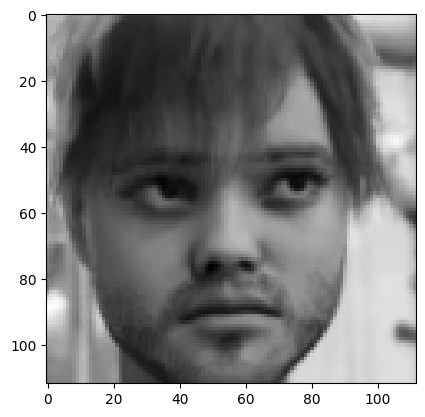

In [115]:
plt.imshow(X_img.reshape(112, 112, 1), cmap='gray') # Show gray, sized image

In [116]:
X_img.shape

(1, 12544)

In [ ]:
# pil_image = Image.fromarray(original_img)
# pil_image.save('30.png') # Save image

In [81]:
# TESTING MODEL
model = Sequential([
    tf.keras.Input(shape=(160000,)),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

2023-01-09 15:35:38.413103: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                4000025   
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 4,000,051
Trainable params: 4,000,051
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

model.fit(X, y, epochs=5)

Epoch 1/10
1/1 [==============================] - 1s 514ms/step - loss: 0.6935
Epoch 2/10
1/1 [==============================] - 0s 32ms/step - loss: 0.6934
Epoch 3/10
1/1 [==============================] - 0s 35ms/step - loss: 0.6933
Epoch 4/10
1/1 [==============================] - 0s 35ms/step - loss: 0.6932
Epoch 5/10
1/1 [==============================] - 0s 37ms/step - loss: 0.6932
Epoch 6/10
1/1 [==============================] - 0s 52ms/step - loss: 0.6932
Epoch 7/10
1/1 [==============================] - 0s 36ms/step - loss: 0.6931
Epoch 8/10
1/1 [==============================] - 0s 38ms/step - loss: 0.6932
Epoch 9/10
1/1 [==============================] - 0s 30ms/step - loss: 0.6932
Epoch 10/10
1/1 [==============================] - 0s 39ms/step - loss: 0.6932


In [109]:
# MODEL PREDICTION TEST
model.predict(X_img)

1/1 [==============================] - 0s 21ms/step


array([[6.3917586e-18]], dtype=float32)